## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

merge_df.head(11)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of mice in the DataFrame.
mouse_count = merge_df['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df[merge_df.duplicated(['Mouse ID','Timepoint'],False)]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# duplicates
merge_df[merge_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[~merge_df['Mouse ID'].str.contains("g989")]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df['Mouse ID'].nunique()
clean_mouse_count

248

In [7]:
## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_group = clean_df.groupby(['Drug Regimen'])

tumor_mean = tumor_group['Tumor Volume (mm3)'].mean()
tumor_median = tumor_group['Tumor Volume (mm3)'].median()
tumor_variance = tumor_group['Tumor Volume (mm3)'].var()
tumor_standard_dev = tumor_group['Tumor Volume (mm3)'].std()
tumor_standard_error = tumor_group['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean, 
                        'Median Tumor Volume':tumor_median, 
                        'Tumor Volume Variance':tumor_variance, 
                        'Tumor Volume Std. Dev.':tumor_standard_dev,
                        'Tumor Volume Std. Err.':tumor_standard_error})

tumor_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#told this part was unnecessary

## Bar Plots

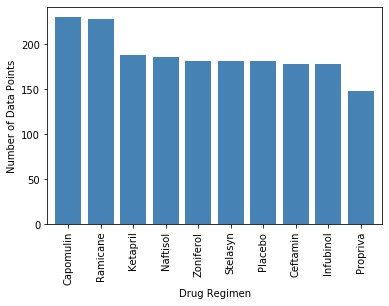

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
#count data points
time_point = clean_df['Drug Regimen'].value_counts()

bar_plot = time_point.plot(kind="bar", width = .8, color="steelblue")


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

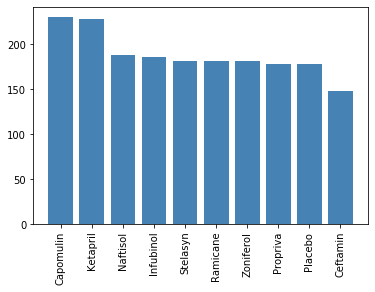

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

drugs = clean_df['Drug Regimen'].unique()
x_axis = np.arange(len(drugs))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs ,rotation='vertical')



plt.bar(x_axis, time_point, color="steelblue", align="center")


## Pie Plots

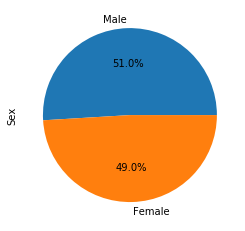

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dis = clean_df['Sex'].value_counts()
gender_plot = gender_dis.plot(kind="pie", autopct='%1.1f%%')



plt.show()
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

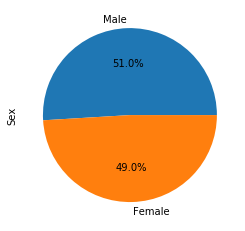

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# The values of each section of the pie chart
sizes = clean_df['Sex'].value_counts()

# Labels for the sections of our pie chart
labels = sizes.index.tolist()

plt.ylabel('Sex')

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, autopct="%1.1f%%")

plt.show


## Quartiles, Outliers and Boxplots

In [19]:
# I need to finish this

#find final tumor volume and determine the 4 smallest excluding placebo
final_tumor_vol = clean_df.drop_duplicates(subset=["Mouse ID"], keep="last")



max_drug = final_tumor_vol.groupby('Drug Regimen')
# drug_count = final_tumor_vol['Drug Regimen']


# tells me that Capomulin, Ceftamin, Infubinol and Ramicane have the smallest tumors
max_drug.max()
drugs = ['Capomulin','Ceftamin','Infubinol','Ramicane' ]




# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 




for drug in drugs:
    new_df = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == drug]
    quartiles = new_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = new_df.loc[(new_df['Tumor Volume (mm3)'] >= upper_bound) | (new_df['Tumor Volume (mm3)'] <= lower_bound)]


    print(f'{drug} potential outliers:{len(outliers)}')




    



Capomulin potential outliers:0
Ceftamin potential outliers:0
Infubinol potential outliers:1
Ramicane potential outliers:0


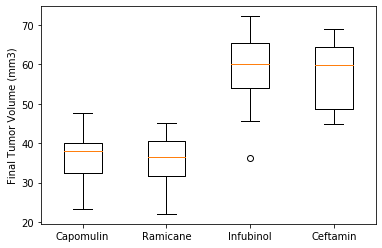

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# get list of final tumor volumes for each drug
capomulin_volume = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)']
infubinol_volume = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == 'Infubinol','Tumor Volume (mm3)']
ceftamin_volume = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == 'Ceftamin','Tumor Volume (mm3)']
ramicane_volume = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == 'Ramicane','Tumor Volume (mm3)']

# arrange into dictionary to plot
volume = {'Capomulin':capomulin_volume, 'Ramicane':ramicane_volume,'Infubinol':infubinol_volume,'Ceftamin':ceftamin_volume }


# box/whisker plot
fig1, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(volume.values())
ax.set_xticklabels(volume.keys())


plt.show()



## Line and Scatter Plots

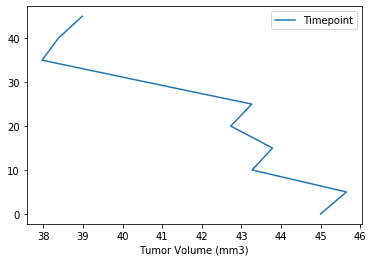

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo = final_tumor_vol['Drug Regimen'] == 'Capomulin'
# i509 = capo['']
mouse_capo = merge_df.loc[(merge_df['Drug Regimen'] == 'Capomulin') & (merge_df['Mouse ID'] == 'b128')]



mouse_capo.plot.line('Tumor Volume (mm3)','Timepoint')


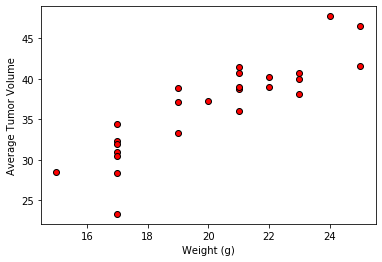

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# List of values from 0 to 100 each value being 1 greater than the last
capomulin_weight = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == 'Capomulin','Weight (g)']
avg_tum_vol = capomulin_volume.mean()

# Create a title, x label, and y label for our chart
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume")


plt.scatter(capomulin_weight, capomulin_volume, marker="o", facecolors="red", edgecolors="black")

## Correlation and Regression

<function matplotlib.pyplot.show(*args, **kw)>

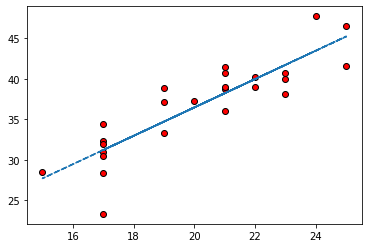

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression on year versus violent crime rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(capomulin_weight, capomulin_volume)

# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * capomulin_weight + vc_int
plt.scatter(capomulin_weight, capomulin_volume, marker="o", facecolors="red", edgecolors="black")
plt.plot(capomulin_weight,vc_fit,"--")
plt.show